Lowpass filter & highpass filter rose.jpg

Highpass filter

(-0.5, 224.5, 224.5, -0.5)

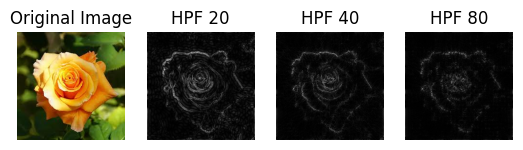

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image = cv2.imread('1-Rose.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
f = np.fft.fft2(gray)
fshift = np.fft.fftshift(f)
height, width, channel = image.shape

def inversed(image):
    f_ishift = np.fft.ifftshift(image)
    image_back_filter = np.fft.ifft2(f_ishift)
    image_back_filter = np.abs(image_back_filter)
    return image_back_filter

def high_pass_filter(rows, cols, cut_off):
    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.ones((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 0
    return mask

hpf_mask_20 = fshift * high_pass_filter(width, height, 20)
hpf_mask_20 = inversed(hpf_mask_20)
hpf_mask_40 = fshift * high_pass_filter(width, height, 40)
hpf_mask_40 = inversed(hpf_mask_40)
hpf_mask_80 = fshift * high_pass_filter(width, height, 80)
hpf_mask_80 = inversed(hpf_mask_80)

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(hpf_mask_20,cmap='gray')
plt.title('HPF 20')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(hpf_mask_40,cmap='gray')
plt.title('HPF 40')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(hpf_mask_80,cmap='gray')
plt.title('HPF 80')
plt.axis('off')

Lowpass filter

(-0.5, 224.5, 224.5, -0.5)

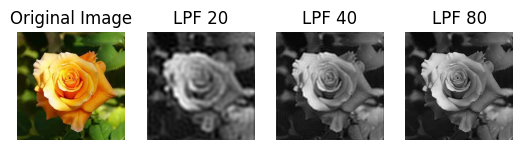

In [2]:
def low_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.zeros((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 1
    return mask    

lpf_mask_20 = fshift * low_pass_filter(width, height, 20)
lpf_mask_20 = inversed(lpf_mask_20)
lpf_mask_40 = fshift * low_pass_filter(width, height, 40)
lpf_mask_40 = inversed(lpf_mask_40)
lpf_mask_80 = fshift * low_pass_filter(width, height, 80)
lpf_mask_80 = inversed(lpf_mask_80)

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(lpf_mask_20,cmap='gray')
plt.title('LPF 20')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(lpf_mask_40,cmap='gray')
plt.title('LPF 40')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(lpf_mask_80,cmap='gray')
plt.title('LPF 80')
plt.axis('off')

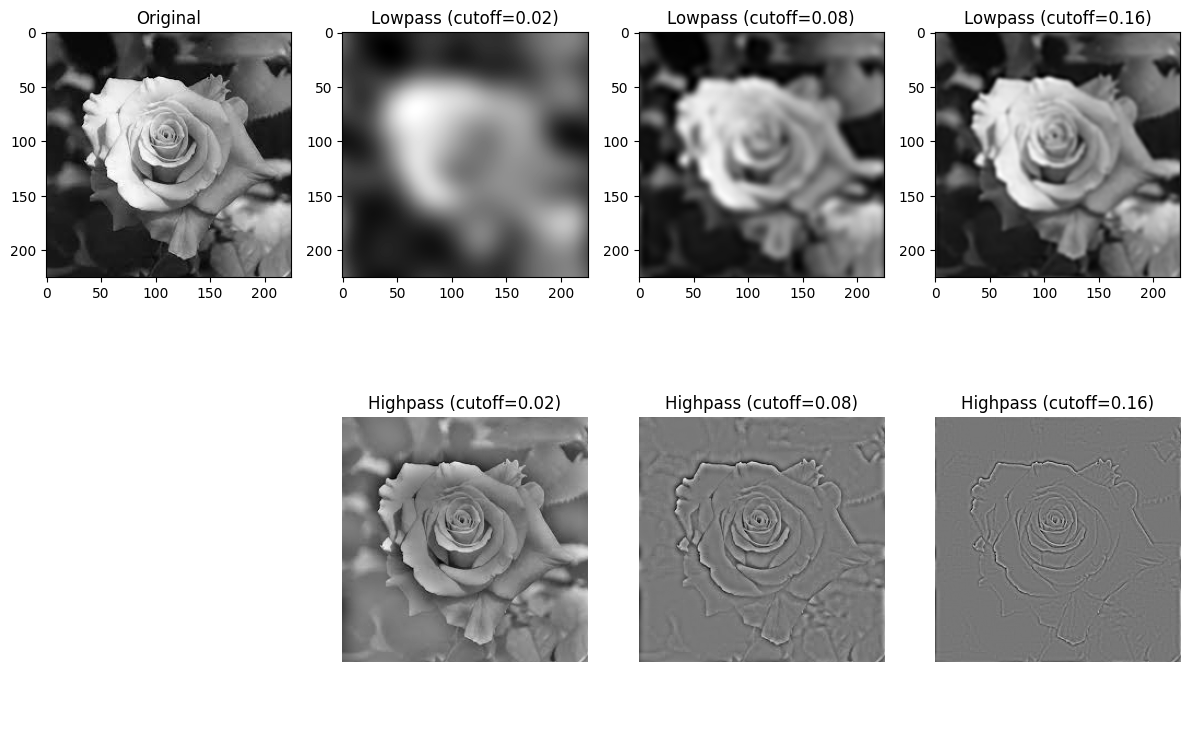

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from scipy.fft import fftfreq, fftshift

def butterworth_filter(image, cutoff_frequency_ratio, order=3):
    # Compute the Fourier transform of the image
    image_fft = np.fft.fft2(image)
    
    # Create Butterworth filter kernel
    rows, cols = image.shape
    u = fftfreq(cols)
    v = fftfreq(rows)
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff_frequency_ratio)**(2 * order))
    
    # Apply the filter to the Fourier transform of the image
    filtered_image_fft = image_fft * H
    
    # Compute the inverse Fourier transform to get the filtered image
    filtered_image = np.fft.ifft2(filtered_image_fft).real
    
    return filtered_image

# Load the image using skimage.io.imread()
image = io.imread('1-Rose.jpg', as_gray=True)

# cutoff frequencies as a fraction of the maximum frequency
cutoffs = [0.02, 0.08, 0.16]

# Perform filtering with the Butterworth filter at a range of cutoffs.
lowpass_filtered = []
highpass_filtered = []

for cutoff in cutoffs:
    lowpass_filtered.append(butterworth_filter(image, cutoff))
    highpass_filtered.append(image - lowpass_filtered[-1])

# Plot the filtered images
fig, axes = plt.subplots(2, len(cutoffs) + 1, figsize=(12, 8))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original')
axes[1, 0].axis('off')
for i, cutoff in enumerate(cutoffs):
    axes[0, i + 1].imshow(lowpass_filtered[i], cmap='gray')
    axes[0, i + 1].set_title(f'Lowpass (cutoff={cutoff})')
    axes[1, i + 1].imshow(highpass_filtered[i], cmap='gray')
    axes[1, i + 1].set_title(f'Highpass (cutoff={cutoff})')
    axes[1, i + 1].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
%pip install scikit-image


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters
from scipy.fft import fftfreq, fftshift


def butterworth_filter(image, cutoff_frequency_ratio, order=3):
    # Compute the Fourier transform of the image
    image_fft = np.fft.fft2(image)
    
    # Create Butterworth filter kernel
    rows, cols = image.shape
    u = fftfreq(cols)
    v = fftfreq(rows)
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / cutoff_frequency_ratio)**(2 * order))
    
    # Apply the filter to the Fourier transform of the image
    filtered_image_fft = image_fft * H
    
    # Compute the inverse Fourier transform to get the filtered image
    filtered_image = np.fft.ifft2(filtered_image_fft).real
    
    return filtered_image


# Load the image using skimage.io.imread()
image = io.imread('1-Rose.jpg', as_gray=True)

# cutoff frequencies as a fraction of the maximum frequency
cutoffs = [0.02, 0.08, 0.16]

# Perform filtering with the Butterworth filter at a range of cutoffs.
lowpass_filtered = []
highpass_filtered = []

for cutoff in cutoffs:
    lowpass_filtered.append(butterworth_filter(image, cutoff))
    highpass_filtered.append(image - lowpass_filtered[-1])

# Plot the filtered images
fig, axes = plt.subplots(2, len(cutoffs) + 1, figsize=(12, 8))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original')
axes[1, 0].axis('off')
for i, cutoff in enumerate(cutoffs):
    axes[0, i + 1].imshow(lowpass_filtered[i], cmap='gray')
    axes[0, i + 1].set_title(f'Lowpass (cutoff={cutoff})')
    axes[1, i + 1].imshow(highpass_filtered[i], cmap='gray')
    axes[1, i + 1].set_title(f'Highpass (cutoff={cutoff})')
    axes[1, i + 1].axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
from PIL import Image

def fourier_transform(image_path):
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    # Fourier Transform
    f_transform = np.fft.fft2(image_array)
    f_transform_shifted = np.fft.fftshift(f_transform)
    # magnitude spectrum
    magnitude_spectrum = np.abs(f_transform_shifted)
    # phase spectrum
    phase_spectrum = np.angle(f_transform_shifted)
    
    return magnitude_spectrum, phase_spectrum, image_array


def inverse_fourier_transform(magnitude_spectrum, phase_spectrum):
    f_transform_combined = magnitude_spectrum * np.exp(1j * phase_spectrum)
    # Inverse Fourier transform
    image_inverse_transform = np.fft.ifft2(np.fft.ifftshift(f_transform_combined)).real
    min_val = np.min(image_inverse_transform)
    max_val = np.max(image_inverse_transform)
    image_inverse_transform_normalized = (image_inverse_transform - min_val) / (max_val - min_val) * 255
    image_inverse_transform_normalized = image_inverse_transform_normalized.astype(np.uint8)
    return image_inverse_transform_normalized

def plot_spectrum(magnitude_spectrum, image_array, inverse_transform_image):
    # Plot the original image, magnitude spectrum, and reconstructed image side by side
    plt.figure(figsize=(18, 6))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Magnitude spectrum
    plt.subplot(1, 3, 2)
    plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.colorbar()
    
    # Inverse transformed image
    plt.subplot(1, 3, 3)
    plt.imshow(inverse_transform_image, cmap='gray')
    plt.title('Inverse Transformed Image')
    plt.axis('off')
    
    plt.show()
    # Print pixel values
    print("Pixel values of Original Image:")
    print(image_array)
    print("\nPixel values of Inverse Transformed Image:")
    print(inverse_transform_image)
    

image_path = '1-Rose.jpg'

magnitude_spectrum, phase_spectrum, image_array = fourier_transform(image_path)
inverse_transform_image = inverse_fourier_transform(magnitude_spectrum, phase_spectrum)
plot_spectrum(magnitude_spectrum, image_array, inverse_transform_image)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def ideal_filter(magnitude_spectrum, radius):  # radius is the value you can change
    rows, cols = magnitude_spectrum.shape
    center_row, center_col = rows // 2, cols // 2
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    # Calculate distances from the center
    distance = np.sqrt((x - center_col)**2 + (y - center_row)**2)
    # Create the ideal filter mask
    filter_mask = distance <= radius
    return filter_mask

def apply_filter(magnitude_spectrum, filter_mask):
    # Apply the filter to the magnitude spectrum
    filtered_magnitude_spectrum = magnitude_spectrum * filter_mask
    return filtered_magnitude_spectrum

def plot_images(image_array, magnitude_spectrum, filtered_magnitude_spectrum):
    plt.figure(figsize=(12, 6))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Magnitude spectrum with filter
    plt.subplot(1, 2, 2)
    plt.imshow(np.log1p(filtered_magnitude_spectrum), cmap='gray')
    plt.title('Filtered Magnitude Spectrum')
    plt.colorbar()
    
    plt.show()

def main(image_path, radius):  # radius is the value you can change
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Perform the Fourier Transform
    f_transform = np.fft.fft2(image_array)
    # Shift the zero frequency component to the center
    f_transform_shifted = np.fft.fftshift(f_transform)
    # Calculate the magnitude spectrum
    magnitude_spectrum = np.abs(f_transform_shifted)
    
    # Create the ideal filter
    filter_mask = ideal_filter(magnitude_spectrum, radius)  # radius is the value you can change
    # Apply the filter to the magnitude spectrum
    filtered_magnitude_spectrum = apply_filter(magnitude_spectrum, filter_mask)
    
    # Plot the images
    plot_images(image_array, magnitude_spectrum, filtered_magnitude_spectrum)

# Path to the image file
image_path = '1-Rose.jpg'
# Radius for the ideal filter - Change this value to customize the filter
radius = 50

# Run the main function
main(image_path, radius)  # Change the radius value as needed


Corner Detecetion

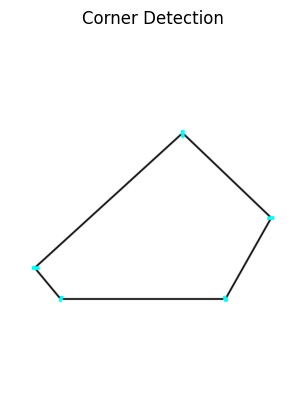

In [8]:
gif_path = "2-Pentagon.gif"

# Open the GIF file
capture = cv2.VideoCapture(gif_path)
ret,frame = capture.read()

def haris_corner(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    corner = cv2.cornerHarris(gray,10,5,0.04)
    corner = cv2.dilate(corner,None)

    threshold = corner > 0.01*corner.max()

    image[threshold]= [0,255,255]


    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title('Corner Detection')
    plt.axis('off')  
    
haris_corner(frame)


Image Stiching

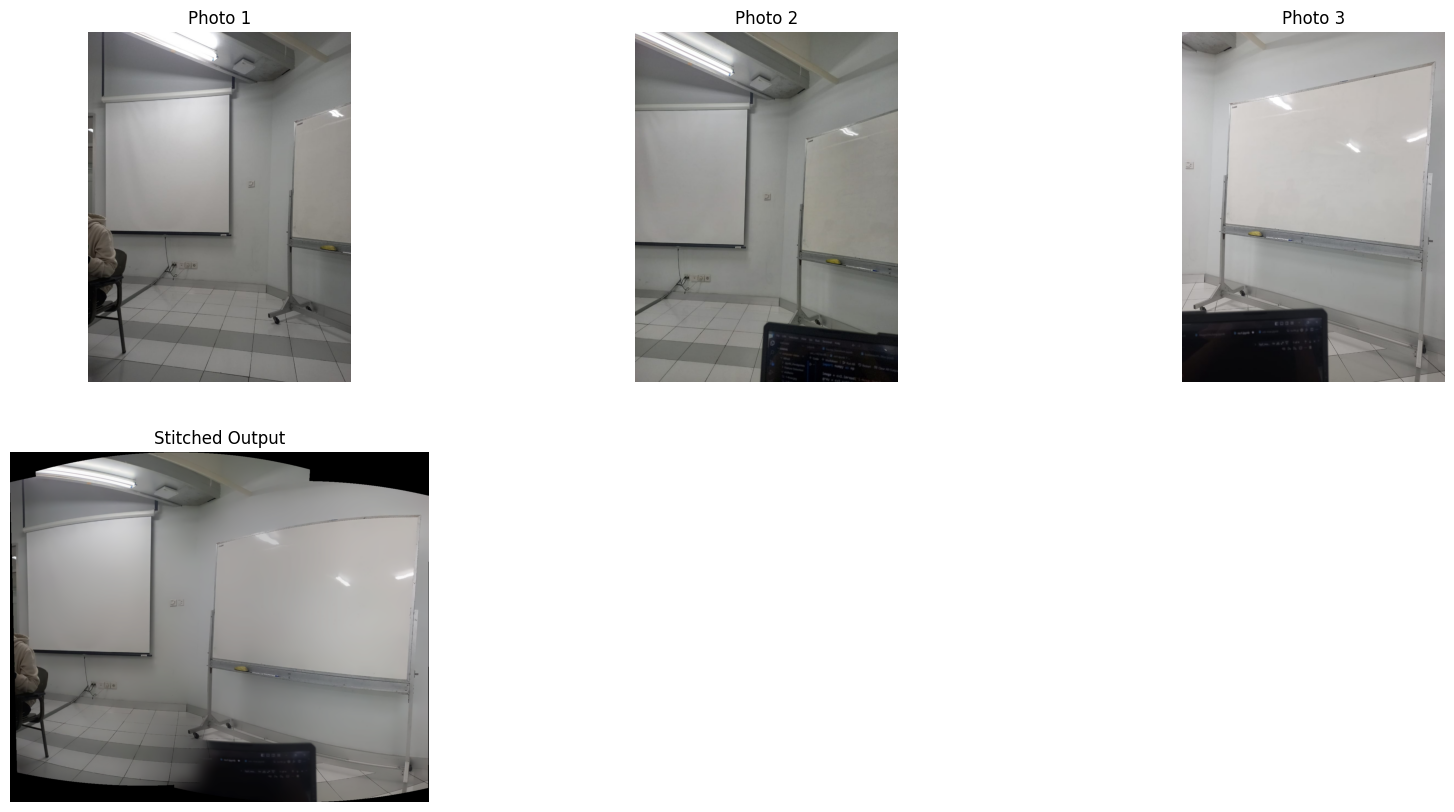

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def main():
    imagePaths = ["kiri.jpg", "depan.jpg", "kanan.jpg"]
    images = []

    for imagePath in imagePaths:
        image = cv2.imread(imagePath)
        images.append(image)

    stitcher = cv2.Stitcher_create() 
    (status, stitched) = stitcher.stitch(images)

    if status == cv2.Stitcher_OK:
        fig, axes = plt.subplots(2, len(images), figsize=(20, 10))
                
        for i, imagePath in enumerate(imagePaths):
            img = cv2.imread(imagePath)
            axes[0, i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            axes[0, i].set_title(f"Photo {i+1}")

            axes[0, i].axis('off')
        
        output_img = cv2.cvtColor(stitched, cv2.COLOR_BGR2RGB)
        axes[1, 0].imshow(output_img)
        axes[1, 0].set_title("Stitched Output")
        axes[1, 0].axis('off')

        for j in range(1, len(images)):
            fig.delaxes(axes[1, j])

        plt.show()

    else:
        print("image stitching failed ({})".format(status))

if __name__ == "__main__":
    main()

In [28]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def crop_and_stitch_images(image_paths):
  """Crops images to the smallest height and stitches them together.

  Args:
      image_paths: A list of paths to the input images.

  Returns:
      A stitched image with the smallest possible height.
  """

  images = []
  min_height = float('inf')
  for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image {image_path}")
        return None
    images.append(image)
    min_height = min(min_height, image.shape[0])  # Find smallest image height

  cropped_images = []
  for image in images:
    top_crop = int((image.shape[0] - min_height) / 2)  # Calculate top crop amount
    cropped_image = image[top_crop : (top_crop + min_height), :]  # Crop image
    cropped_images.append(cropped_image)

  stitcher = cv2.Stitcher_create()
  (status, stitched) = stitcher.stitch(cropped_images, [])  # Pass empty list for masks

  if status == cv2.Stitcher_OK:
    return stitched
  else:
    print("Image stitching failed ({})".format(status))
    return None

def main():
  image_paths = ["kiri.jpg", "depan.jpg", "kanan.jpg"]
  stitched_image = crop_and_stitch_images(image_paths)

  if stitched_image is not None:
    # Optional: Display the stitched and cropped output using OpenCV
    cv2.imshow("Stitched Output (Cropped)", cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
  main()
